# Starting out with Bokeh

## Histogram of Flight Delays

In this notebook, we will get our first experience with [Bokeh](https://bokeh.pydata.org/en/latest/), a powerful plotting library in Python. Throughout this series of notebooks, we will use the [nycflights13](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf) dataset. 

In [1]:
# Pandas for data manipulation,
import pandas as pd
import numpy as np

## Basic Glyphs

In [2]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]

circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)

# Circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')


# Set to output the plot in the notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

# Data Inspection

In [4]:
flights = pd.read_csv('../data/flights.csv', index_col=0)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


We are going to focus on a single variable, in this case the arrival delay in minutes. Before we get into plotting, we will want to take a look at the summary statistics for the arrival delay.

In [5]:
flights['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

# Histogram 

The first graph we will make is a simple histogram of the arrival delay. We will consider all airlines on the same plot.

## Data for plotting

In [6]:
# Bins will be five minutes in width
# Limit delays to [-60, +120] minutes using the range
arr_hist, edges = np.histogram(flights['arr_delay'], 
                               bins = int(180/5), 
                               range = [-60, 120])

# Put the information in a dataframe
delays = pd.DataFrame({'flights': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

In [7]:
delays.head()

,flights,left,right
0,276,-60.0,-55.0
1,636,-55.0,-50.0
2,1394,-50.0,-45.0
3,2820,-45.0,-40.0
4,5339,-40.0,-35.0


In [8]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)]', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph
p.quad(bottom=0, top=delays['flights'], 
       left=delays['left'], right=delays['right'], 
       fill_color='red', line_color='black')

# Show the plot
show(p)

## matplotlib equivalent

In [10]:
import matplotlib.pyplot as plt
plt.hist(flights['arr_delay'], bins = int(180/5), range = (-60, 120));
plt.xlabel('Delay (min)'); plt.ylabel('Number of Flights')
plt.title('Histogram of Arrival Delays')
plt.show();

# Add Basic Styling

In [11]:
# Style function that takes in a plot
def style(p):
    # Title 
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'
    
    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'
    
    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

# Add Aesthetics
styled_p = style(p)

# Show plot
show(styled_p)

# Column Data Source

In [13]:
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource

In [14]:
# Formatted columns for Hover Tooltips (see next section)
delays['f_flights'] = ['%d flights' % count for count in delays['flights']]
delays['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(delays['left'], delays['right'])]

delays.head()

,flights,left,right,f_flights,f_interval
0,276,-60.0,-55.0,276 flights,-60 to -55 minutes
1,636,-55.0,-50.0,636 flights,-55 to -50 minutes
2,1394,-50.0,-45.0,1394 flights,-50 to -45 minutes
3,2820,-45.0,-40.0,2820 flights,-45 to -40 minutes
4,5339,-40.0,-35.0,5339 flights,-40 to -35 minutes


In [15]:
# Convert to column data source
src = ColumnDataSource(delays)
src.data.keys()

dict_keys(['flights', 'left', 'right', 'f_flights', 'f_interval', 'index'])

# Add in Tooltips on Hover

In [16]:
# Import the hover tool class
from bokeh.models import HoverTool

Example of hovertool referring to both field in our datasource and attribute of the graph.

```python
h = HoverTool(tooltips = [('Delay Interval Left ', '@left'),
                          ('(x,y)', '($x, $y)')])
```

In [17]:
h = HoverTool(tooltips = [('Delay Interval Left ', '@left'),
                          ('(x,y)', '($x, $y)')])

In [18]:
# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Arrival Delays',
          x_axis_label = 'Delay (min)]', 
           y_axis_label = 'Number of Flights')

# Add a quad glyph with source this time
p.quad(bottom=0, top='flights', left='left', right='right', source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Delay', '@f_interval'),
                             ('Num of Flights', '@f_flights')])

# Style the plot
p = style(p)

# Add the hover tool to the graph
p.add_tools(hover)

# Show the plot
show(p)

## Save the Plot

```python
from bokeh.io import output_file

output_file('hist.html')
show(p)
```

# Delay Proportion by Carrier

In [20]:
# Group by the carrier to find the most common
carrier_nums = flights.groupby('carrier')['year'].count().sort_values(ascending=False)

In [21]:
carrier_nums

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: year, dtype: int64

In [22]:
# Subset to the 8 most common carriers
flights = flights[flights['carrier'].isin(carrier_nums.index[:5])]

# Subset to only [-2, +2] hour delays
flights = flights[(flights['arr_delay'] >= -120) & (flights['arr_delay'] <= 120)]

## Find actual carrier names

In [23]:
carrier_names = pd.read_csv('../data/airlines.csv')
carrier_names.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [24]:
flights = flights.merge(carrier_names, how = 'left', on = 'carrier')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [25]:
from bokeh.palettes import Category10_5

by_carrier = pd.DataFrame(columns=['proportion', 'left', 'right', 
                                   'f_proportion', 'f_interval',
                                   'name', 'color'])

# Iterate through all the carriers
for i, carrier_name in enumerate(flights['name'].unique()):
    
    # Subset to the carrier
    subset = flights[flights['name'] == carrier_name]
    
    # Create a histogram with 5 minute bins
    arr_hist, edges = np.histogram(subset['arr_delay'], bins = int(240/5), range = [-120, 120])
    
    # Divide the counts by the total to get a proportion
    arr_df = pd.DataFrame({'proportion': arr_hist / np.sum(arr_hist), 'left': edges[:-1], 'right': edges[1:] })
    
    # Format the proportion 
    arr_df['f_proportion'] = ['%0.5f' % proportion for proportion in arr_df['proportion']]
    
    # Format the interval
    arr_df['f_interval'] = ['%d to %d minutes' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]
    
    # Assign the carrier for labels
    arr_df['name'] = carrier_name
    
    # Color each carrier differently
    arr_df['color'] = Category10_5[i]

    # Add to the overall dataframe
    by_carrier = by_carrier.append(arr_df)
    
# Overall dataframe
by_carrier = by_carrier.sort_values(['name', 'left'])

In [26]:
by_carrier.head()

,color,f_interval,f_proportion,left,name,proportion,right
0,#ff7f0e,-120 to -115 minutes,0.00000,-120.0,American Airlines Inc.,0.0,-115.0
1,#ff7f0e,-115 to -110 minutes,0.00000,-115.0,American Airlines Inc.,0.0,-110.0
2,#ff7f0e,-110 to -105 minutes,0.00000,-110.0,American Airlines Inc.,0.0,-105.0
3,#ff7f0e,-105 to -100 minutes,0.00000,-105.0,American Airlines Inc.,0.0,-100.0
4,#ff7f0e,-100 to -95 minutes,0.00000,-100.0,American Airlines Inc.,0.0,-95.0


In [27]:
by_carrier_src = ColumnDataSource(by_carrier)

In [28]:
# Create the figure
p = figure(plot_height = 600, plot_width = 800, title = 'Histogram of Airline Delays by Carrier',
          x_axis_label = 'Arrival Delay (min)', y_axis_label = 'Proportion')

# Add the quad glpyh with the source by carrier
p.quad(bottom = 0, left = 'left', right = 'right', top = 'proportion',
       fill_color = 'color',  legend = 'name', source = by_carrier_src,
      fill_alpha = 0.6, hover_fill_alpha = 1.0, hover_fill_color = 'color')

# Create the hover tool
hover = HoverTool(tooltips = [('Carrier', '@name'),
                              ('Proportion', '@f_proportion'),
                              ('Delay', '@f_interval')],
                 mode = 'vline')

# Add styling and hover tool
styled_p = style(p)
styled_p.add_tools(hover)
show(styled_p)

# Lighter Weight Approach Using Seaborn

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

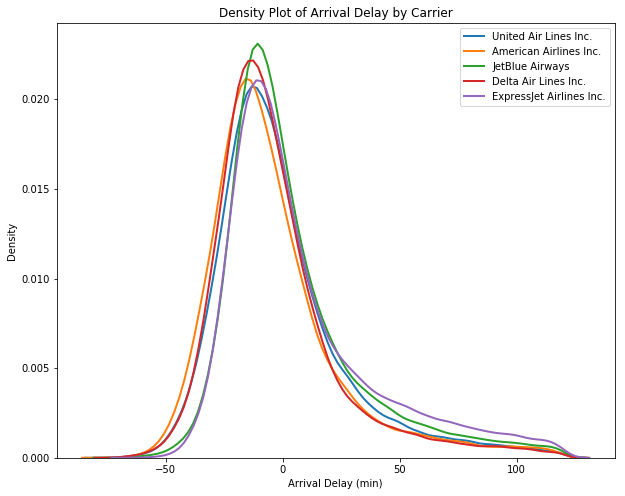

In [31]:
# Create a figure
plt.figure(figsize=(10, 8))

# Iterate through each carrier and make a density plot (kde)
for i, carrier in enumerate(flights['name'].unique()):
    subset = flights[flights['name'] == carrier]
    sns.kdeplot(subset['arr_delay'], color = Category10_5[i], label = '%s' % carrier, lw = 2 );

plt.xlabel('Arrival Delay (min)')
plt.ylabel('Density')
plt.title('Density Plot of Arrival Delay by Carrier')
plt.legend();